In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
#a. Place the data in the data frame goblet
goblets = pd.read_csv("Prehistoric goblets from Thailand.csv", delimiter=";")

In [7]:
#b. Which columns do you need to remove in order to perform a Principal Component Analysis?  Remove any columns with the wrong scale, columns that do not make sense,....
gobletsCorrect = goblets.drop(["Goblet"], axis=1)

Explained variance in %: [0.71196296 0.18202957 0.06412462 0.02373272 0.01088228 0.00726785]


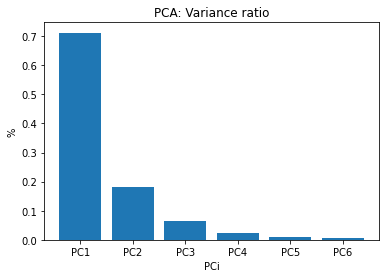

In [9]:
#c. Perform a Principal Components Analysis - do not forget to standardize the data-and interpret the results.
gobletsCorrectZ =pd.DataFrame()
for column in gobletsCorrect:
	mean = gobletsCorrect[column].mean()
	standev = gobletsCorrect[column].std()
	gobletsCorrectZ[column] = (gobletsCorrect[column] - mean)/standev
gobletsCorrectZ.index= gobletsCorrect.index.values
pca_dim = min(gobletsCorrectZ.shape[1], gobletsCorrectZ.shape[0])
pcamodel = PCA(pca_dim)
principalComponents = pcamodel.fit_transform(gobletsCorrectZ)
print('Explained variance in %:', pcamodel.explained_variance_ratio_)

def putIntoBarChart():
	labels_bar = ['PC{}'.format(i) for i in range(1,pca_dim+1)]
	plt.figure()
	plt.bar(labels_bar, pcamodel.explained_variance_ratio_)

	plt.title('PCA: Variance ratio')
	plt.xlabel('PCi')
	plt.ylabel('%')
	plt.show()

putIntoBarChart()

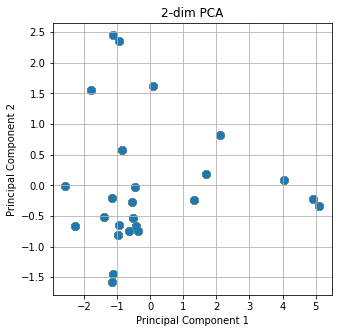

In [10]:
#d. Visualise theexplainedvariance and make abiplot(PC1 and PC2)
def showBiPlot():
	principalDf= pd.DataFrame()
	principalDf['PC1'] = principalComponents[:,0]
	principalDf['PC2'] = principalComponents[:,1]
	fig, ax = plt.subplots(figsize=(5, 5))
	ax.set_xlabel('Principal Component 1')
	ax.set_ylabel('Principal Component 2')
	ax.set_title('2-dim PCA')
	markers = list(matplotlib.markers.MarkerStyle.markers.keys())
	for m in zip(markers):
		ax.scatter(principalDf['PC1'], principalDf['PC2'], s = 50)
	ax.grid(True)
	plt.show()

showBiPlot()

In [11]:
#e. Create a  new data  frame with the  following  variables-use  the  original  datato  obtain  the ratios’s-: 
# V1 = X2/X1
# V2 = X2/X4
# V3 = X1/X4
# V4 = X2/X5
# V5 = X1/X5
# V6 = X4/X5
# V7 = X3/X6

def createNewDataframe():
	newDF = pd.DataFrame()
	newDF['V1'] = goblets['X2'] / goblets['X1']
	newDF['V2'] = goblets['X2'] / goblets['X4']
	newDF['V3'] = goblets['X1'] / goblets['X4']
	newDF['V4'] = goblets['X2'] / goblets['X5']
	newDF['V5'] = goblets['X1'] / goblets['X5']
	newDF['V6'] = goblets['X4'] / goblets['X5']
	newDF['V7'] = goblets['X3'] / goblets['X6']
	return newDF

newDF = createNewDataframe()

In [12]:
#f. Perform a Principal Component Analysis on the data frame ratios and interpret the results.
newDFZ =pd.DataFrame()
for column in newDF:
	mean = newDF[column].mean()
	standev = newDF[column].std()
	newDFZ[column] = (newDF[column] - mean)/standev
newDFZ.index= newDF.index.values
pca_dim = min(newDFZ.shape[1], newDFZ.shape[0])
pcamodel = PCA(pca_dim)
principalComponents = pcamodel.fit_transform(newDFZ)
print('Explained variance in %:', pcamodel.explained_variance_ratio_)

Explained variance in %: [0.4336619  0.31222977 0.18849232 0.06245196 0.00161163 0.00092278
 0.00062964]


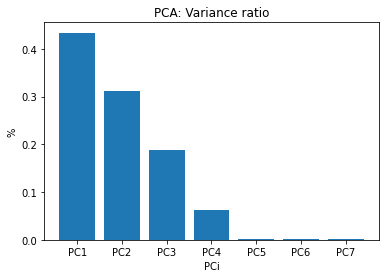

In [14]:
#g. Visualise theexplainedvariance and make abiplot(PC1 and PC2)
def putIntoBarChart2():
	labels_bar = ['PC{}'.format(i) for i in range(1,pca_dim+1)]
	plt.figure()
	plt.bar(labels_bar, pcamodel.explained_variance_ratio_)

	plt.title('PCA: Variance ratio')
	plt.xlabel('PCi')
	plt.ylabel('%')
	plt.show()

def showBiPlot2():
	principalDf= pd.DataFrame()
	principalDf['PC1'] = principalComponents[:,0]
	principalDf['PC2'] = principalComponents[:,1]
	fig, ax = plt.subplots(figsize=(5, 5))
	ax.set_xlabel('Principal Component 1')
	ax.set_ylabel('Principal Component 2')
	ax.set_title('2-dim PCA')
	markers = list(matplotlib.markers.MarkerStyle.markers.keys())
	for m in zip(markers):
		ax.scatter(principalDf['PC1'], principalDf['PC2'], s = 50)
	ax.grid(True)
	plt.show()

putIntoBarChart2()
showBiPlot2()

In [15]:
#h. Compare  the  results  of  both  Principal  Components  Analysis and formulate  a  conclusion(possibly look at the mean correlations).
print(gobletsCorrect.corr(method="pearson").stack().mean())
print(newDF.corr(method="pearson").stack().mean())

0.7003348376208017
0.29729658066514847
